# Time series

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime

The Python standard library includes data types for date and time data, as well as calendar-related functionality. The datetime, time, and calendar modules are the main places to start. The datetime.datetime type, or simply datetime, is widely used:

In [2]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.401092
2011-01-05    1.446951
2011-01-07   -2.197901
2011-01-08    0.618457
2011-01-10    1.136101
2011-01-12    0.129925
dtype: float64

Internally, Pandas uses DatetimeIndex objects to index time series:

In [3]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like with any other Series, arithmetic operations are performed after alignment:

In [4]:
ts + ts[::2]

2011-01-02    0.802184
2011-01-05         NaN
2011-01-07   -4.395802
2011-01-08         NaN
2011-01-10    2.272202
2011-01-12         NaN
dtype: float64

Scalar values in a time index are Timestamp objects:

In [5]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

A Timestamp can be used anywhere where a datetime object would be accepted. Additionally, it can store information about event frequencies and understands timezone conversions.

### Indexing, selection, subsetting

TimeSeries is a subclass of Series and thus behaves in the same way with regard to indexing and selecting data based on label:

In [6]:
stamp = ts.index[2]
ts[stamp]

np.float64(-2.197901221949828)

As a convenience, you can also pass a string that is interpretable as a date:

In [7]:
ts['1/10/2011']

np.float64(1.1361011637968592)

In [8]:
ts['20110110']

np.float64(1.1361011637968592)

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [9]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    1.932398
2000-01-02    1.183615
2000-01-03   -0.029385
2000-01-04    0.259493
2000-01-05    1.391110
                ...   
2002-09-22    1.529550
2002-09-23   -1.628267
2002-09-24    0.763311
2002-09-25   -1.132554
2002-09-26   -0.816175
Freq: D, Length: 1000, dtype: float64

In [10]:
longer_ts['2001']

2001-01-01   -0.575120
2001-01-02    0.151099
2001-01-03   -0.903808
2001-01-04   -0.322351
2001-01-05   -0.581132
                ...   
2001-12-27    0.380024
2001-12-28    1.185005
2001-12-29    0.421918
2001-12-30   -0.531593
2001-12-31    0.067352
Freq: D, Length: 365, dtype: float64

In [11]:
longer_ts['2001-05']

2001-05-01    0.077324
2001-05-02    1.071672
2001-05-03    2.578312
2001-05-04    0.526210
2001-05-05    1.439955
2001-05-06   -0.860091
2001-05-07   -0.002022
2001-05-08   -1.801975
2001-05-09   -0.387396
2001-05-10    1.510805
2001-05-11   -0.704781
2001-05-12    0.089430
2001-05-13   -1.390905
2001-05-14    0.749063
2001-05-15    0.544581
2001-05-16    0.596248
2001-05-17    2.035037
2001-05-18    0.016577
2001-05-19    1.312720
2001-05-20    0.932469
2001-05-21    0.073880
2001-05-22   -0.149781
2001-05-23   -1.854578
2001-05-24    0.601521
2001-05-25   -0.569989
2001-05-26    0.154735
2001-05-27    0.111660
2001-05-28    0.613008
2001-05-29   -0.471404
2001-05-30    0.951964
2001-05-31   -1.002400
Freq: D, dtype: float64

Slicing with dates works just like with a regular Series:

In [12]:
ts[datetime(2011, 1, 7):]

2011-01-07   -2.197901
2011-01-08    0.618457
2011-01-10    1.136101
2011-01-12    0.129925
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [13]:
ts

2011-01-02    0.401092
2011-01-05    1.446951
2011-01-07   -2.197901
2011-01-08    0.618457
2011-01-10    1.136101
2011-01-12    0.129925
dtype: float64

In [14]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -2.197901
2011-01-08    0.618457
2011-01-10    1.136101
dtype: float64

As before you can pass either a string date, datetime, or Timestamp. Remember that slicing in this manner produces views on the source time series just like slicing NumPy arrays. There is an equivalent instance method truncate which slices a TimeSeries between two dates:

In [15]:
ts.truncate(after='1/9/2011')

2011-01-02    0.401092
2011-01-05    1.446951
2011-01-07   -2.197901
2011-01-08    0.618457
dtype: float64

All of the above holds true for DataFrame as well, indexing on its rows:

In [16]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') # Weekly: wednesdays
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Spain', 'France', 'Portugal', 'Germany'])
long_df.loc['5-2001']

,Spain,France,Portugal,Germany
2001-05-02,2.129336,0.681517,-0.625293,0.991035
2001-05-09,-0.188136,-0.042570,0.454561,-0.093551
2001-05-16,-2.435030,0.996752,-0.022397,-0.749617
2001-05-23,-1.659216,1.144877,-0.408467,1.060202
2001-05-30,0.518453,-0.426068,-0.781641,0.162705


### Time series with duplicate indices

In some applications, there may be multiple data observations falling on a particular timestamp:

In [17]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

We can tell that the index is not unique by checking its $is_unique$ property:

In [18]:
dup_ts.index.is_unique

False

Indexing into this time series will now either produce scalar values or slices depending on whether a timestamp is duplicated:

In [19]:
dup_ts['1/3/2000']

np.int64(4)

In [20]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Suppose you wanted to aggregate the data having non-unique timestamps. One way to do this is to use groupby and pass level=0 (the only level of indexing!):

In [21]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [22]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, frequencies, and shifting

Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. For many applications this is sufficient. However, it’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series. Fortunately pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed frequency date ranges.

### Generating date ranges

While we used it previously without explanation, you may have guessed that pandas.date_range() is responsible for generating a DatetimeIndex with an indicated length according to a particular frequency:

In [23]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, date_range generates daily timestamps. If you pass only a start or end date, you must pass a number of periods to generate:

In [24]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [25]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index. For example, if you wanted a date index containing the last business day of each month, you would pass the 'BM' frequency (business end of month) and only dates falling on or inside the date interval will be included:

In [26]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM') # Does not generate a point in Dec

/tmp/ipykernel_47769/1157487351.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range('1/1/2000', '12/1/2000', freq='BM') # Does not generate a point in Dec


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

date_range() by default preserves the time (if any) of the start or end timestamp:

In [27]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but want to generate a set of timestamps normalized to midnight as a convention. To do this, there is a normalize option:

In [28]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and date offsets

Frequencies in pandas are composed of a base frequency and a multiplier. Base frequencies are typically referred to by a string alias, like 'M' for monthly or 'H' for hourly. For each base frequency, there is an object defined generally referred to as a date offset . For example, hourly frequency can be represented with the Hour class:

In [29]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

We can define a multiple of an offset by passing an integer:

In [30]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In most applications, you would never need to explicitly create one of these objects, instead using a string alias like 'H' or '4H' . Putting an integer before the base frequency creates a multiple:

In [31]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

Many offsets can be combined together by addition:

In [32]:
Hour(2) + Minute(30)

<150 * Minutes>

Similarly, you can pass frequency strings like '2h30min' which will effectively be parsed to the same expression:

In [33]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

Some frequencies describe points in time that are not evenly spaced. For example, 'M' (calendar month end) and 'BM' (last business/weekday of month) depend on the number of days in a month and, in the latter case, whether the month ends on a weekend or not.

One useful frequency class is “week of month”, starting with WOM . This enables you to get dates like the third Friday of each month:

In [34]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

### Shifting (leading and lagging) data

“Shifting” refers to moving data backward and forward through time. Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified:

In [35]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

/tmp/ipykernel_47769/1422889821.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range('1/1/2000', periods=4, freq='M'))


2000-01-31    0.796991
2000-02-29    0.578699
2000-03-31   -0.779997
2000-04-30    1.865719
Freq: ME, dtype: float64

In [36]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.796991
2000-04-30    0.578699
Freq: ME, dtype: float64

In [37]:
ts.shift(-2)

2000-01-31   -0.779997
2000-02-29    1.865719
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

A common use of shift() is computing percent changes in a time series or multiple time series as DataFrame columns:

In [38]:
ts / ts.shift(1)

2000-01-31         NaN
2000-02-29    0.726105
2000-03-31   -1.347846
2000-04-30   -2.391956
Freq: ME, dtype: float64

Because naive shifts leave the index unmodified, some data is discarded. Thus if the frequency is known, it can be passed to data:

In [39]:
ts.shift(2, freq='M')

/tmp/ipykernel_47769/1044886577.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2, freq='M')


2000-03-31    0.796991
2000-04-30    0.578699
2000-05-31   -0.779997
2000-06-30    1.865719
Freq: ME, dtype: float64

In [40]:
ts.shift(3, freq='D')

2000-02-03    0.796991
2000-03-03    0.578699
2000-04-03   -0.779997
2000-05-03    1.865719
dtype: float64

In [41]:
ts.shift(1, freq='3D')

2000-02-03    0.796991
2000-03-03    0.578699
2000-04-03   -0.779997
2000-05-03    1.865719
dtype: float64

In [42]:
ts.shift(1, freq='90T')

/tmp/ipykernel_47769/987384525.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq='90T')


2000-01-31 01:30:00    0.796991
2000-02-29 01:30:00    0.578699
2000-03-31 01:30:00   -0.779997
2000-04-30 01:30:00    1.865719
dtype: float64

The pandas date offsets can also be used with datetime or Timestamp objects:

In [43]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2015, 6, 17)
now + 3 * Day()

Timestamp('2015-06-20 00:00:00')

If you add an anchored offset like MonthEnd, the first increment will roll forward a date to the next date according to the frequency rule:

In [44]:
now + MonthEnd()

Timestamp('2015-06-30 00:00:00')

Anchored offsets can explicitly “roll” dates forward or backward using their rollforward() and rollback() methods, respectively:

In [45]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2015-06-30 00:00:00')

In [46]:
offset.rollback(now)

Timestamp('2015-05-31 00:00:00')

A clever use of date offsets is to use these methods with groupby():

In [47]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.400271
2000-01-19    0.060459
2000-01-23   -0.911350
2000-01-27   -0.210060
2000-01-31    0.354354
2000-02-04   -0.642880
2000-02-08    0.065482
2000-02-12    0.391776
2000-02-16    0.185538
2000-02-20   -1.816925
2000-02-24   -0.909046
2000-02-28   -1.510243
2000-03-03    1.119608
2000-03-07    0.097791
2000-03-11   -1.126211
2000-03-15   -0.258828
2000-03-19   -1.558095
2000-03-23    0.331811
2000-03-27    0.424696
2000-03-31   -1.105893
Freq: 4D, dtype: float64

In [48]:
ts.groupby(offset.rollforward).mean() # Medias de enero, febrero y marzo

2000-01-31   -0.221374
2000-02-29   -0.605185
2000-03-31   -0.259390
dtype: float64

Of course, an easier and faster way to do this is using resample() (more on this later):

In [49]:
ts.resample('M').mean()

/tmp/ipykernel_47769/2305925915.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M').mean()


2000-01-31   -0.221374
2000-02-29   -0.605185
2000-03-31   -0.259390
Freq: ME, dtype: float64

## Timezone handling

By default, times in Pandas have no associated timezone:

In [50]:
rng = pd.date_range('3/25/2015 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

DatetimeIndex objects have an associated $tz$ parameter, which is None by default:

In [51]:
print(ts.index.tz)

None


But we can generate date ranges with a specific timezone:

In [52]:
pd.date_range('3/25/2015 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2015-03-25 09:30:00+00:00', '2015-03-26 09:30:00+00:00',
               '2015-03-27 09:30:00+00:00', '2015-03-28 09:30:00+00:00',
               '2015-03-29 09:30:00+00:00', '2015-03-30 09:30:00+00:00',
               '2015-03-31 09:30:00+00:00', '2015-04-01 09:30:00+00:00',
               '2015-04-02 09:30:00+00:00', '2015-04-03 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

And Series provides a tz_localize() method to add a timezone to already-generated time indices:

In [53]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2015-03-25 09:30:00+00:00    0.946728
2015-03-26 09:30:00+00:00   -1.099755
2015-03-27 09:30:00+00:00    0.605170
2015-03-28 09:30:00+00:00   -0.618598
2015-03-29 09:30:00+00:00   -1.554564
2015-03-30 09:30:00+00:00    1.973673
Freq: D, dtype: float64

In [54]:
ts_utc.index

DatetimeIndex(['2015-03-25 09:30:00+00:00', '2015-03-26 09:30:00+00:00',
               '2015-03-27 09:30:00+00:00', '2015-03-28 09:30:00+00:00',
               '2015-03-29 09:30:00+00:00', '2015-03-30 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time series has been localized, it can be converted to another one using tz_convert():

In [55]:
ts_utc.tz_convert('Europe/Paris')

2015-03-25 10:30:00+01:00    0.946728
2015-03-26 10:30:00+01:00   -1.099755
2015-03-27 10:30:00+01:00    0.605170
2015-03-28 10:30:00+01:00   -0.618598
2015-03-29 11:30:00+02:00   -1.554564
2015-03-30 11:30:00+02:00    1.973673
Freq: D, dtype: float64

In this example, timestamps cross the DST change time, when official french time changes from UTC+1 to UTC+2. This change is applied to the index. However, the US had already applied DST by the second week of March:

In [56]:
ts_utc.tz_convert( 'US/Central' )

2015-03-25 04:30:00-05:00    0.946728
2015-03-26 04:30:00-05:00   -1.099755
2015-03-27 04:30:00-05:00    0.605170
2015-03-28 04:30:00-05:00   -0.618598
2015-03-29 04:30:00-05:00   -1.554564
2015-03-30 04:30:00-05:00    1.973673
Freq: D, dtype: float64

Internally, Pandas uses the pytz library, an interface to the "Olson Database" which contains information about timezones and time changes.

tz_localize() and tz_convert() are also available from the DatetimeIndex class:

In [57]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2015-03-25 09:30:00+08:00', '2015-03-26 09:30:00+08:00',
               '2015-03-27 09:30:00+08:00', '2015-03-28 09:30:00+08:00',
               '2015-03-29 09:30:00+08:00', '2015-03-30 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with timezone-aware timestamp objects

Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time zone-aware and converted from one time zone to another: 

In [58]:
stamp = pd.Timestamp('2015-05-26 14:09')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('Europe/Paris')

Timestamp('2015-05-26 16:09:00+0200', tz='Europe/Paris')

Timezone-aware timestamp objects internally store a UTC timestamp value as nanoseconds since the UNIX epoch (January 1, 1970); this UTC value is invariant between time zone conversions. The only thing varying is the $tz$ attribute of the object:

In [59]:
stamp_utc.value, stamp_utc.tz

(1432649340000000000, datetime.timezone.utc)

In [60]:
stamp_eastern = stamp_utc.tz_convert('US/Eastern')
stamp_eastern.value, stamp_eastern.tz

(1432649340000000000, <DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

When performing time arithmetic using pandas’s DateOffset objects, daylight savings time transitions are respected where possible:

In [61]:
# 90 minutes before change to DST
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2015-03-29 00:30', tz='Europe/Paris' )
stamp

Timestamp('2015-03-29 00:30:00+0100', tz='Europe/Paris')

In [62]:
stamp + 2*Hour()

Timestamp('2015-03-29 03:30:00+0200', tz='Europe/Paris')

In [63]:
# 3 horas before change out of DST
stamp = pd.Timestamp('2015-10-25 00:30', tz='Europe/Paris')
stamp

Timestamp('2015-10-25 00:30:00+0200', tz='Europe/Paris')

In [64]:
stamp + 3*Hour()

Timestamp('2015-10-25 02:30:00+0100', tz='Europe/Paris')

### Operations between different time zones

If two time series with different time zones are combined, the result will be UTC. Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen:

In [65]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    2.128669
2012-03-08 09:30:00    0.394260
2012-03-09 09:30:00   -0.400604
2012-03-12 09:30:00    0.235234
2012-03-13 09:30:00   -0.348920
2012-03-14 09:30:00   -0.131370
2012-03-15 09:30:00    1.862146
2012-03-16 09:30:00   -0.504207
2012-03-19 09:30:00   -0.253217
2012-03-20 09:30:00   -1.378286
Freq: B, dtype: float64

In [66]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and period arithmetic

Periods represent time spans, like days, months, quarters, or years:

In [67]:
p = pd.Period(2007, freq='A-DEC')
p

/tmp/ipykernel_47769/3368258612.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period(2007, freq='A-DEC')


Period('2007', 'Y-DEC')

In this case, the Period object represents the full timespan from January 1, 2007 to December 31, 2007, inclusive. Conveniently, adding and subtracting integers from periods has the effect of shifting by their frequency:

In [68]:
p + 5

Period('2012', 'Y-DEC')

In [69]:
p - 2

Period('2005', 'Y-DEC')

If two periods have the same frequency, their difference is the number of units between them:

In [70]:
pd.Period('2014', freq='A-DEC') - p

/tmp/ipykernel_47769/1089596655.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period('2014', freq='A-DEC') - p


<7 * YearEnds: month=12>

Regular ranges of periods can be constructed using the period_range() function:

In [71]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

The PeriodIndex class stores a sequence of periods and can serve as an axis index in any pandas data structure:

In [72]:
Series(np.random.randn(6), index=rng)

2000-01    0.786293
2000-02    0.997983
2000-03   -0.995700
2000-04   -0.874699
2000-05   -1.079971
2000-06    1.323766
Freq: M, dtype: float64

If you have an array of strings, you can also appeal to the PeriodIndex class itself:

In [73]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period frequency conversion

Periods and PeriodIndex objects can be converted to another frequency using their asfreq() method. As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year:

In [74]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

/tmp/ipykernel_47769/1713761259.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period('2007', freq='A-DEC')


Period('2007-01', 'M')

In [75]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

For a fiscal year ending in a different month than December, we would need a different conversion:

In [76]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

/tmp/ipykernel_47769/138440308.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p = pd.Period('2007', freq='A-JUN')


Period('2006-07', 'M')

In [77]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

When converting from high to low frequency, the superperiod will be determined depending on where the subperiod “belongs”. For example, in A-JUN frequency, the month Aug-2007 is actually part of the 2008 period:

In [78]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

/tmp/ipykernel_47769/1315818685.py:2: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p.asfreq('A-JUN')


Period('2008', 'Y-JUN')

Whole PeriodIndex objects or TimeSeries can be similarly converted with the same semantics:

In [79]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

/tmp/ipykernel_47769/17805371.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  rng = pd.period_range('2006', '2009', freq='A-DEC')


2006    0.419217
2007    1.592393
2008   -0.201403
2009   -1.433037
Freq: Y-DEC, dtype: float64

In [80]:
ts.asfreq('M', how='start')

2006-01    0.419217
2007-01    1.592393
2008-01   -0.201403
2009-01   -1.433037
Freq: M, dtype: float64

In [81]:
ts.asfreq('B', how='end')

/tmp/ipykernel_47769/3401117408.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq('B', how='end')


2006-12-29    0.419217
2007-12-31    1.592393
2008-12-31   -0.201403
2009-12-31   -1.433037
Freq: B, dtype: float64

### Quarterly period frequencies

Quarterly data is standard in accounting, finance, and other fields. Much quarterly data is reported relative to a fiscal year end, typically the last calendar or business day of one of the 12 months of the year. As such, the period 2012Q4 has a different meaning depending on fiscal year end. pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [82]:
p = pd.Period('2015Q4', freq='Q-JAN')
p

Period('2015Q4', 'Q-JAN')

In the case of fiscal year ending in January, 2012Q4 runs from November through January, which you can check by converting to daily frequency:

In [83]:
p.asfreq('D', 'start')

Period('2014-11-01', 'D')

In [84]:
p.asfreq('D', 'end')

Period('2015-01-31', 'D')

Thus, it’s possible to do period arithmetic very easily; for example, to get the timestamp at 4PM on the 2nd to last business day of the quarter, you could do:

In [85]:
p4pm = (p.asfreq('B', 'end') - 1).asfreq('T', 's') + 16 * 60
p4pm

/tmp/ipykernel_47769/2654000518.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq('B', 'end') - 1).asfreq('T', 's') + 16 * 60
/tmp/ipykernel_47769/2654000518.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq('B', 'end') - 1).asfreq('T', 's') + 16 * 60


Period('2015-01-29 16:00', 'min')

In [86]:
p4pm.to_timestamp()

Timestamp('2015-01-29 16:00:00')

Generating quarterly ranges works as you would expect using period_range():

In [87]:
rng = pd.period_range('2013Q3', '2015Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2013Q3    0
2013Q4    1
2014Q1    2
2014Q2    3
2014Q3    4
2014Q4    5
2015Q1    6
2015Q2    7
2015Q3    8
2015Q4    9
Freq: Q-JAN, dtype: int64

In [88]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('H', 'start') + 16
ts.index = new_rng.to_timestamp()
ts

/tmp/ipykernel_47769/2618996624.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_rng = (rng.asfreq('B', 'e') - 1).asfreq('H', 'start') + 16
/tmp/ipykernel_47769/2618996624.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_rng = (rng.asfreq('B', 'e') - 1).asfreq('H', 'start') + 16


2012-10-30 16:00:00    0
2013-01-30 16:00:00    1
2013-04-29 16:00:00    2
2013-07-30 16:00:00    3
2013-10-30 16:00:00    4
2014-01-30 16:00:00    5
2014-04-29 16:00:00    6
2014-07-30 16:00:00    7
2014-10-30 16:00:00    8
2015-01-29 16:00:00    9
dtype: int64

### Converting between Timestamp and Period

Series and DataFrame objects indexed by timestamps can be converted to periods using the to_period() method:

In [89]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
ts

/tmp/ipykernel_47769/3482792486.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range('1/1/2000', periods=3, freq='M')


2000-01-31    0.177607
2000-02-29    0.416166
2000-03-31    1.060473
Freq: ME, dtype: float64

In [90]:
pts = ts.to_period()
pts

2000-01    0.177607
2000-02    0.416166
2000-03    1.060473
Freq: M, dtype: float64

Since periods always refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency. While the frequency of the new PeriodIndex is inferred from the timestamps by default, you can specify any frequency you want. There is also no problem with having duplicate periods in the result:

In [91]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -1.153717
2000-01-30   -0.119556
2000-01-31   -2.032595
2000-02-01    1.415985
2000-02-02    1.128172
2000-02-03    0.319010
Freq: D, dtype: float64

In [92]:
ts2.to_period('M')

2000-01   -1.153717
2000-01   -0.119556
2000-01   -2.032595
2000-02    1.415985
2000-02    1.128172
2000-02    0.319010
Freq: M, dtype: float64

To convert back to timestamps, use to_timestamp():

In [93]:
pts.to_timestamp( how="end" )

2000-01-31 23:59:59.999999999    0.177607
2000-02-29 23:59:59.999999999    0.416166
2000-03-31 23:59:59.999999999    1.060473
dtype: float64

### Creating a PeriodIndex from arrays

Fixed frequency data sets are sometimes stored with timespan information spread across multiple columns. For example, in this macroeconomic data set, the year and quarter are in different columns:

In [94]:
data = pd.read_csv('Files-08/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [95]:
data[['year', 'quarter']]

,year,quarter
0,1959.0,1.0
1,1959.0,2.0
2,1959.0,3.0
3,1959.0,4.0
4,1960.0,1.0
...,...,...
198,2008.0,3.0
199,2008.0,4.0
200,2009.0,1.0
201,2009.0,2.0


By passing these arrays to PeriodIndex with a frequency, they can be combined to form an index for the DataFrame:

In [96]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

/tmp/ipykernel_47769/4207175619.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [97]:
data.index = index
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Resampling and frequency conversion

Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called *downsampling*, while converting lower frequency to higher frequency is called *upsampling*. Not all resampling falls into either of these categories; for example, converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downstampling. 

pandas objects are equipped with a resample method, which is the workhorse function for all frequency conversion:

In [98]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    1.951754
2000-01-02    0.789639
2000-01-03   -1.277743
2000-01-04   -0.271579
2000-01-05   -0.079467
                ...   
2000-04-05    3.093987
2000-04-06    1.143179
2000-04-07   -0.295098
2000-04-08    0.893494
2000-04-09   -0.257639
Freq: D, Length: 100, dtype: float64

In [99]:
ts.resample('M').mean()

/tmp/ipykernel_47769/2305925915.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M').mean()


2000-01-31   -0.294037
2000-02-29   -0.258993
2000-03-31    0.153652
2000-04-30    0.265439
Freq: ME, dtype: float64

### Downsampling

The data you’re aggregating doesn’t need to be fixed frequently; the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, 'M' or 'BM' , the data need to be chopped up into one month intervals. Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame. There are a couple things to think about when using resample to downsample data: Which side of each interval is closed How to label each aggregated bin, either with the start of the interval or the end To illustrate, let’s look at some one-minute data:

In [100]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

/tmp/ipykernel_47769/3846981496.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rng = pd.date_range('1/1/2000', periods=12, freq='T')


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

Suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group:

In [101]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

By default, the left bin edge is inclusive, so the 00:05 value is included in the 00:00 to 00:05 interval. Passing closed='right' changes the interval to be closed on the left:

In [102]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

As you can see, the resulting time series is labeled by the timestamps from the right side of each bin. By passing label='right' you can label them with the right bin edge:

In [103]:
ts.resample('5min', closed='right', label='right' ).sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

#### Resampling with groupby()

An alternative method to downsample is to use groupby():

In [104]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
              ..
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int64

In [105]:
ts.groupby( ts.index.month ).mean()

1    15.0
2    45.0
3    75.0
4    95.0
dtype: float64

In [106]:
ts.groupby( ts.index.weekday ).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

When converting from a low frequency to a higher frequency, no aggregation is needed. Let’s consider a DataFrame with some weekly data:

In [107]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Spain', 'France', 'Portugal', 'Germany'])
frame

,Spain,France,Portugal,Germany
2000-01-05,-0.177851,-0.219987,0.589154,-1.114990
2000-01-12,1.954756,-0.028313,-2.052259,2.951822


When resampling this to daily frequency, by default missing values are introduced:

In [108]:
df_daily = frame.resample('D')
df_daily

The same filling or interpolation methods available in the fillna() and reindex() methods are available for resampling:

In [109]:
frame.resample('D' ).ffill()

,Spain,France,Portugal,Germany
2000-01-05,-0.177851,-0.219987,0.589154,-1.114990
2000-01-06,-0.177851,-0.219987,0.589154,-1.114990
2000-01-07,-0.177851,-0.219987,0.589154,-1.114990
2000-01-08,-0.177851,-0.219987,0.589154,-1.114990
2000-01-09,-0.177851,-0.219987,0.589154,-1.114990
2000-01-10,-0.177851,-0.219987,0.589154,-1.114990
2000-01-11,-0.177851,-0.219987,0.589154,-1.114990
2000-01-12,1.954756,-0.028313,-2.052259,2.951822


You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value:

In [110]:
frame.resample( 'D' ).ffill( limit=2 )

,Spain,France,Portugal,Germany
2000-01-05,-0.177851,-0.219987,0.589154,-1.114990
2000-01-06,-0.177851,-0.219987,0.589154,-1.114990
2000-01-07,-0.177851,-0.219987,0.589154,-1.114990
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.954756,-0.028313,-2.052259,2.951822


Notably, the new date index need not overlap with the old one at all:

In [111]:
frame.resample('W-THU').ffill()

,Spain,France,Portugal,Germany
2000-01-06,-0.177851,-0.219987,0.589154,-1.114990
2000-01-13,1.954756,-0.028313,-2.052259,2.951822


### Resampling with periods

Resampling data indexed by periods is reasonably straightforward and works as you would hope:

In [112]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Spain', 'France', 'Portugal', 'Germany'])
frame.head()

,Spain,France,Portugal,Germany
2000-01,-0.415905,1.420577,0.772666,-0.276578
2000-02,0.652537,1.180111,1.411454,1.064677
2000-03,-2.068352,-0.315321,-2.430618,1.029323
2000-04,-0.174979,0.721338,0.860773,0.560817
2000-05,-0.678075,1.822853,0.135594,-0.250515


In [113]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

/tmp/ipykernel_47769/198437850.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame = frame.resample('A-DEC').mean()
/tmp/ipykernel_47769/198437850.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample('A-DEC').mean()


,Spain,France,Portugal,Germany
2000,0.067279,0.827709,0.221566,0.221134
2001,0.425419,-0.298520,0.353256,-0.034884


Upsampling is more nuanced as you must make a decision about which end of the timespan in the new frequency to place the values before resampling, just like the asfreq() method. The convention argument defaults to 'end' but can also be 'start':

In [114]:
annual_frame.resample('Q-DEC').ffill()

/tmp/ipykernel_47769/2878672077.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC').ffill()


,Spain,France,Portugal,Germany
2000Q1,0.067279,0.827709,0.221566,0.221134
2000Q2,0.067279,0.827709,0.221566,0.221134
2000Q3,0.067279,0.827709,0.221566,0.221134
2000Q4,0.067279,0.827709,0.221566,0.221134
2001Q1,0.425419,-0.298520,0.353256,-0.034884
2001Q2,0.425419,-0.298520,0.353256,-0.034884
2001Q3,0.425419,-0.298520,0.353256,-0.034884
2001Q4,0.425419,-0.298520,0.353256,-0.034884


In [115]:
annual_frame.resample('Q-DEC', convention="end" ).ffill()

/tmp/ipykernel_47769/1272364581.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC', convention="end" ).ffill()
/tmp/ipykernel_47769/1272364581.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC', convention="end" ).ffill()


,Spain,France,Portugal,Germany
2000Q4,0.067279,0.827709,0.221566,0.221134
2001Q1,0.067279,0.827709,0.221566,0.221134
2001Q2,0.067279,0.827709,0.221566,0.221134
2001Q3,0.067279,0.827709,0.221566,0.221134
2001Q4,0.425419,-0.298520,0.353256,-0.034884


Since periods refer to timespans, the rules about upsampling and downsampling are more rigid: In downsampling, the target frequency must be a subperiod of the source frequency; In upsampling, the target frequency must be a superperiod of the source frequency. If these rules are not satisfied, an exception will be raised. This mainly affects the quarterly, annual, and weekly frequencies; for example, the timespans defined by Q-MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC :

In [116]:
annual_frame.resample('Q-MAR', convention='start').ffill()

/tmp/ipykernel_47769/287411913.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-MAR', convention='start').ffill()
/tmp/ipykernel_47769/287411913.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-MAR', convention='start').ffill()


,Spain,France,Portugal,Germany
2000Q4,0.067279,0.827709,0.221566,0.221134
2001Q1,0.067279,0.827709,0.221566,0.221134
2001Q2,0.067279,0.827709,0.221566,0.221134
2001Q3,0.067279,0.827709,0.221566,0.221134
2001Q4,0.425419,-0.298520,0.353256,-0.034884
2002Q1,0.425419,-0.298520,0.353256,-0.034884
2002Q2,0.425419,-0.298520,0.353256,-0.034884
2002Q3,0.425419,-0.298520,0.353256,-0.034884


In [117]:
#annual_frame.resample('Q-APR').ffill()
#---------------------------------------------------------------------------
#ValueError                                Traceback (most recent call last)
#<ipython-input-278-cc047cd4187a> in <module>()
#----> 1 annual_frame.resample('Q-APR', fill_method='ffill')
#
#/usr/lib/python2.7/site-packages/pandas/core/generic.pyc in resample(self, rule, how, axis, fill_method, closed, label, convention, kind, loffset, limit, base)
#   3195                               fill_method=fill_method, convention=convention,
#   3196                               limit=limit, base=base)
#-> 3197         return sampler.resample(self).__finalize__(self)
#   3198 
#   3199     def first(self, offset):
#
#/usr/lib/python2.7/site-packages/pandas/tseries/resample.pyc in resample(self, obj)
#     93 
#     94             if self.kind is None or self.kind == 'period':
#---> 95                 rs = self._resample_periods()
#     96             else:
#     97                 obj = self.obj.to_timestamp(how=self.convention)
#
#/usr/lib/python2.7/site-packages/pandas/tseries/resample.pyc in _resample_periods(self)
#    363         else:
#    364             raise ValueError('Frequency %s cannot be resampled to %s'
#--> 365                              % (axlabels.freq, self.freq))
#    366 
#    367 
#
#ValueError: Frequency A-DEC cannot be resampled to <QuarterEnd: startingMonth=4>

## Time series plotting

In [118]:
%matplotlib inline

Plots with pandas time series have improved date formatting compared with matplotlib out of the box:

In [119]:
close_px_all = pd.read_csv('Files-10/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2292 non-null   float64
 1   MSFT    2292 non-null   float64
 2   XOM     2292 non-null   float64
dtypes: float64(3)
memory usage: 71.6 KB


Calling plot on one of the columns grenerates a simple plot:

<Axes: >

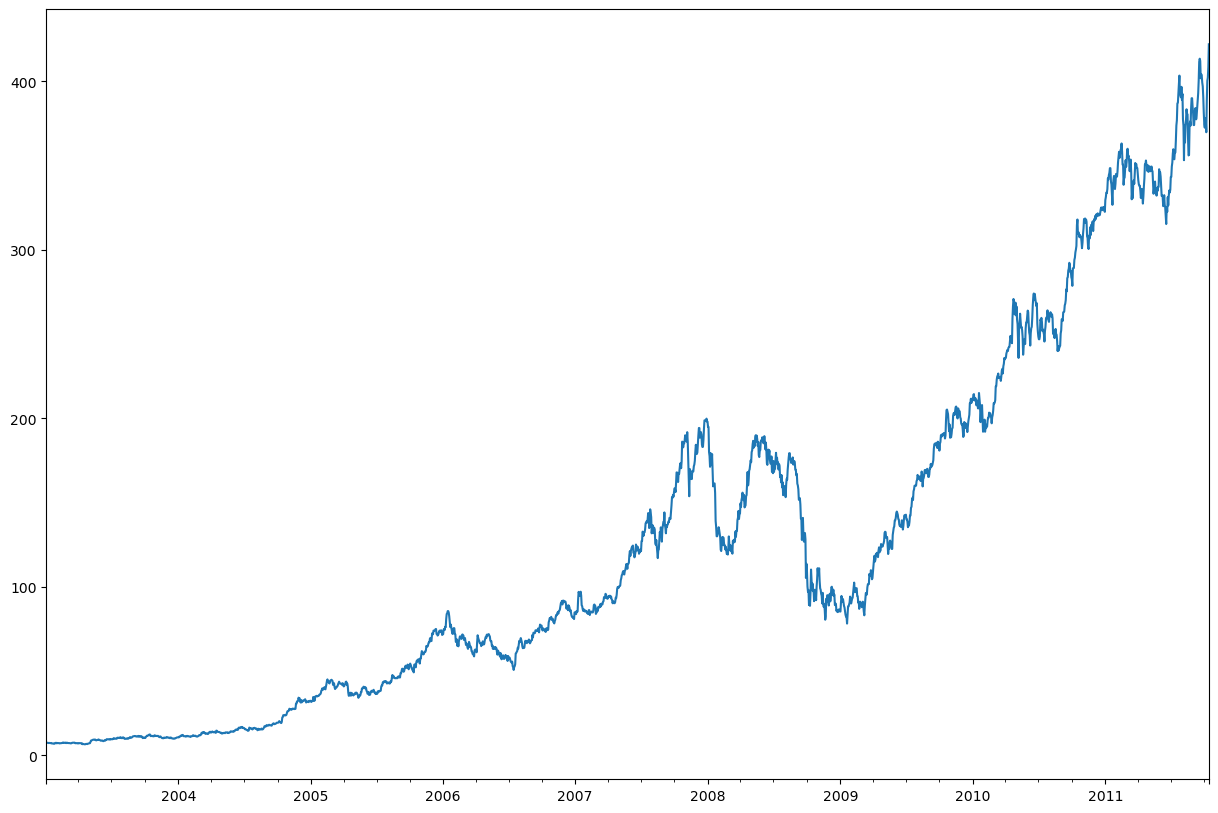

In [120]:
close_px['AAPL'].plot( figsize=(15,10) )

When called on a DataFrame, as you would expect, all of the time series are drawn on a single subplot with a legend indicating which is which:

<Axes: >

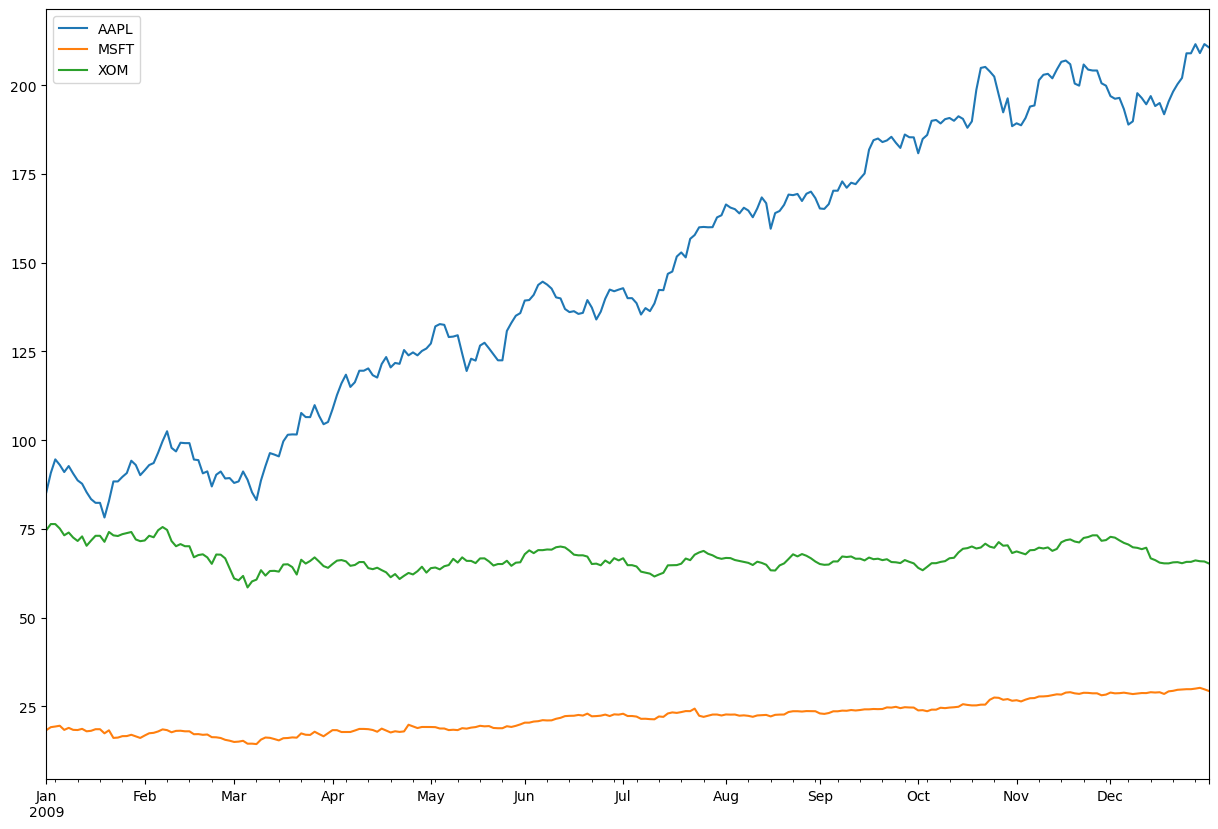

In [121]:
close_px.loc['2009'].plot( figsize=(15,10) )

<Axes: >

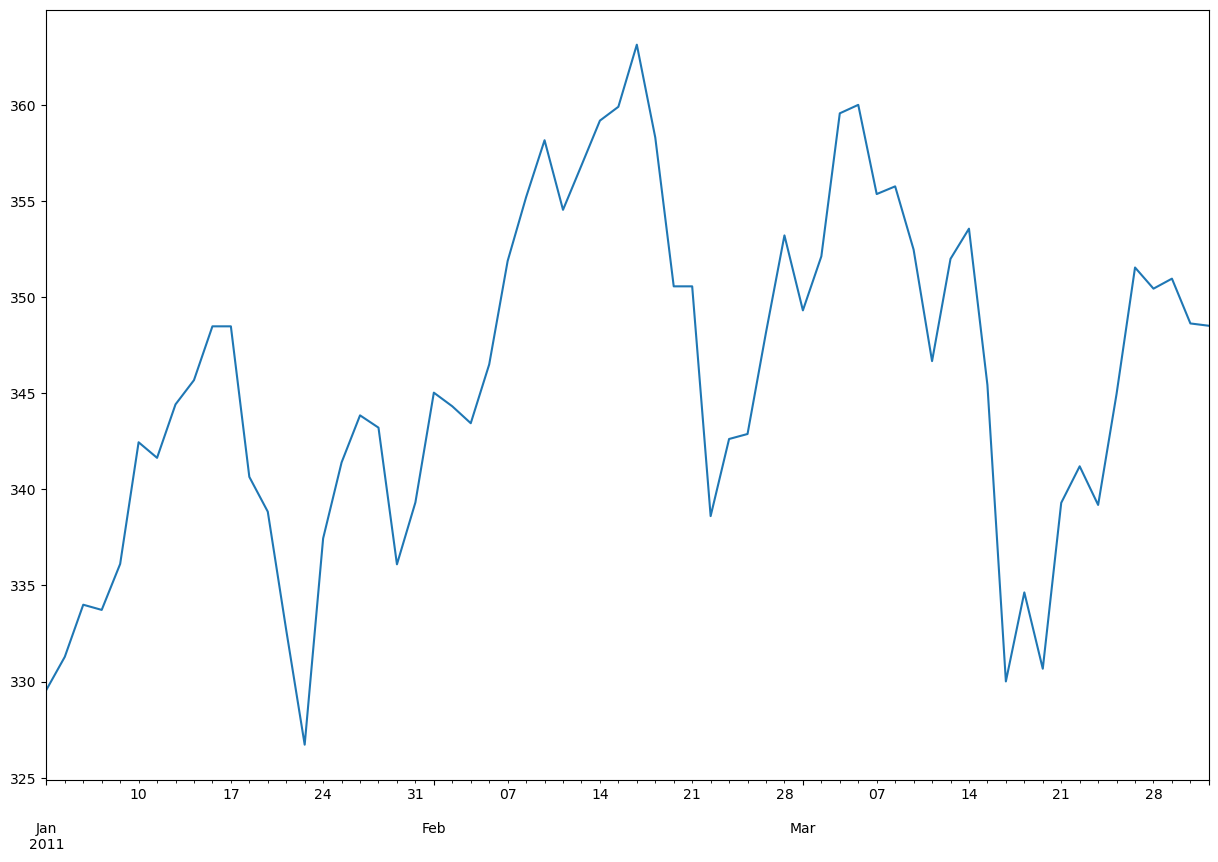

In [122]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot( figsize=(15,10) )

The time axis automatically adapts its ticks and labels to the time range to draw. Quarterly data can be conveniently represented:

/tmp/ipykernel_47769/3990863683.py:1: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  appl_q = close_px['AAPL'].resample('Q-DEC').mean()


<Axes: >

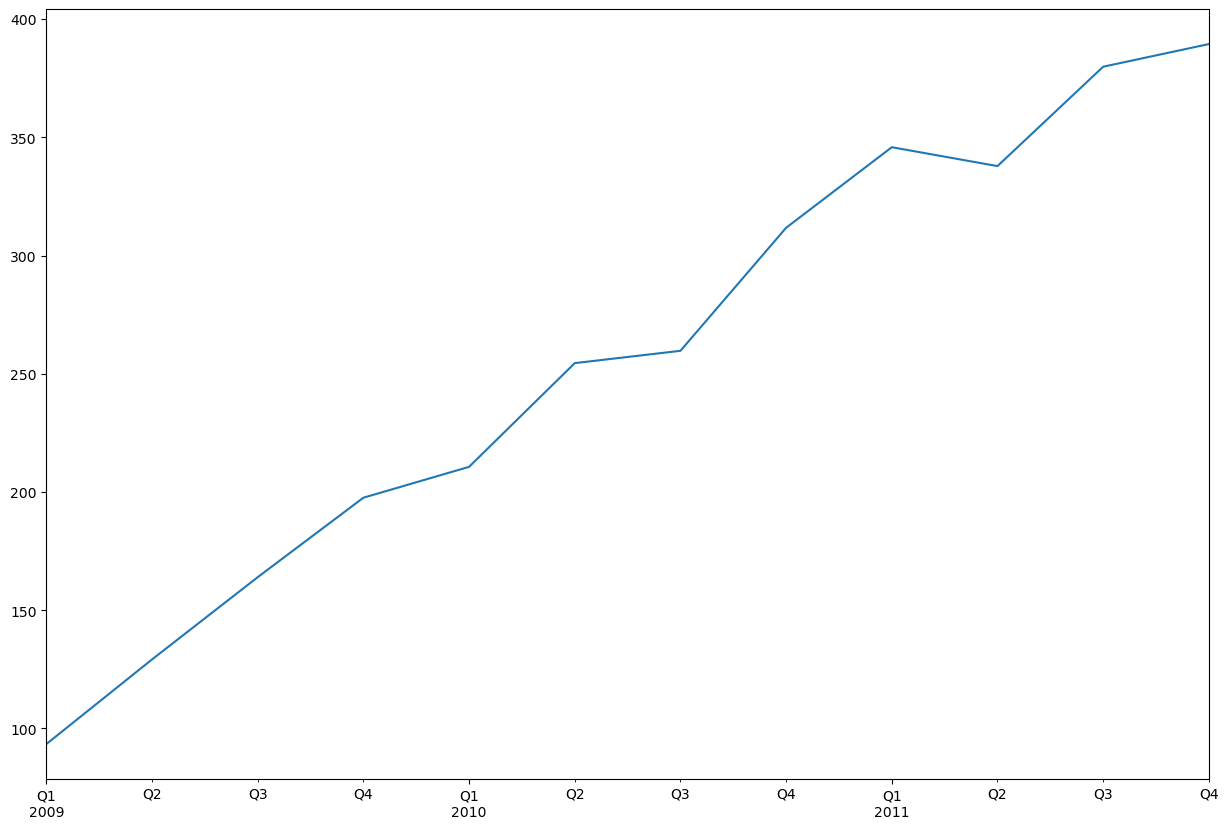

In [123]:
appl_q = close_px['AAPL'].resample('Q-DEC').mean()
appl_q.loc['2009':].plot( figsize=(15,10) )

When using interactive plots, changing zoom automatically modifies the time axis labels (uncomment and execute to test):

In [124]:
#%matplotlib
#close_px['AAPL'].plot( figsize=(15,10) )
#%matplotlib inline

## Moving window functions

A common class of array transformations intended for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights. Like other statistical functions, these also automatically exclude missing data. The rolling() method generates a Rolling object, similar to GroupBy. On this object we can apply aggregation functions as with GroupBy objects:

<Axes: >

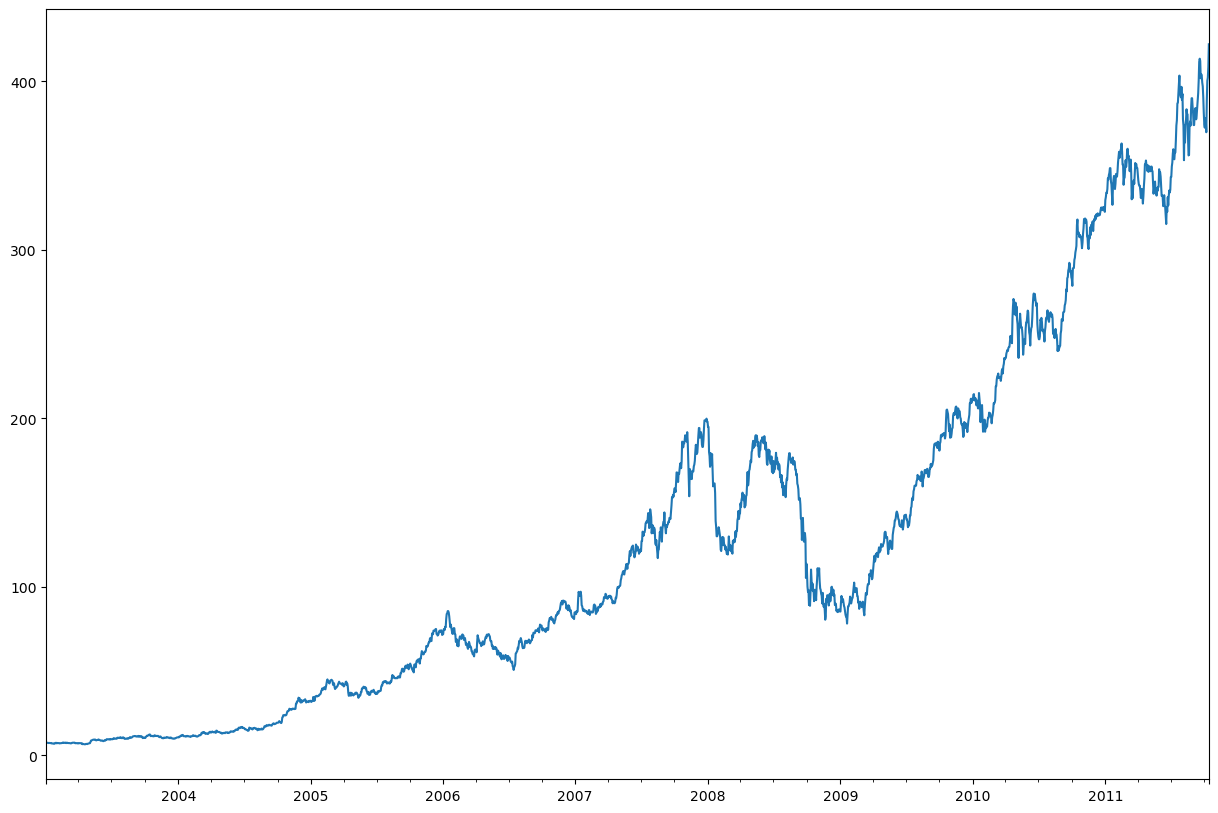

In [125]:
close_px = close_px.asfreq('B')
close_px.AAPL.plot( figsize=(15,10) )

<Axes: >

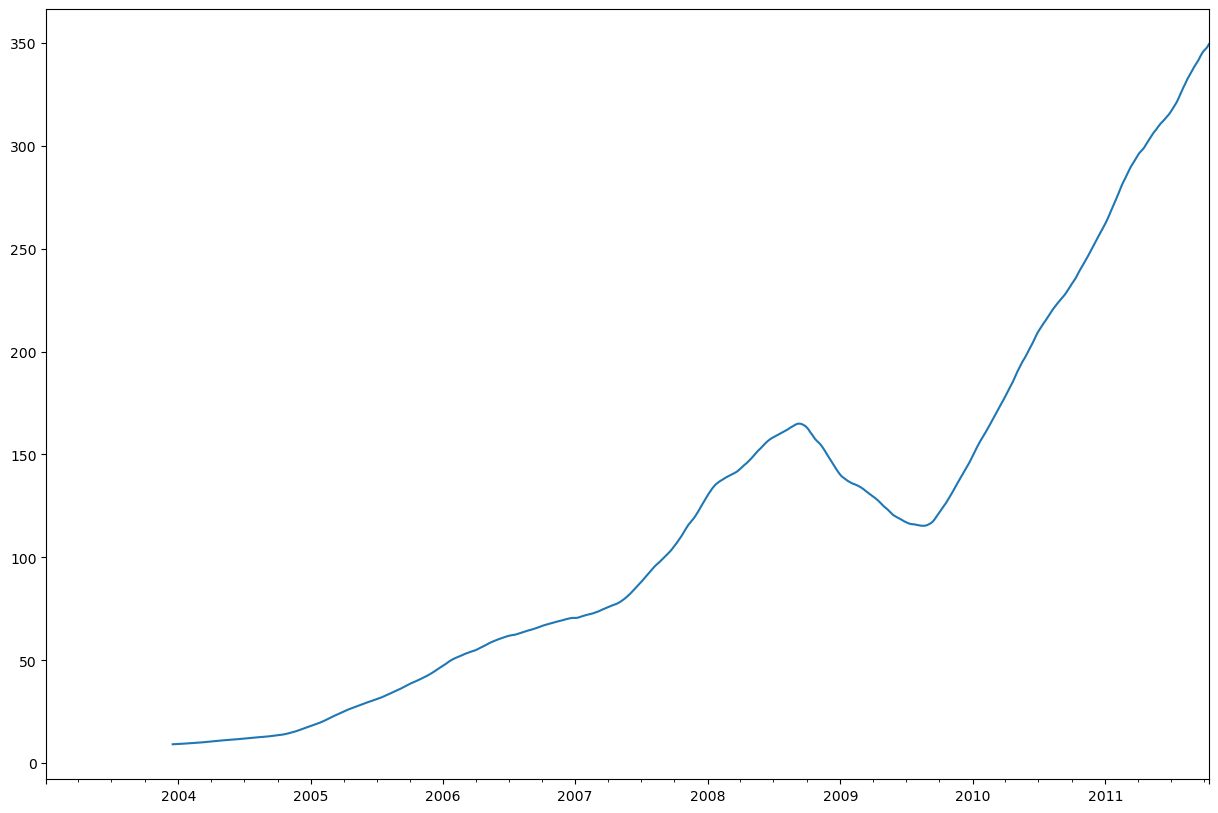

In [126]:
close_px.AAPL.rolling( window=250, center=False ).mean().plot( figsize=(15,10) )

By default, rolling() requires the indicated number of non-NA observations. This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series:

In [127]:
appl_std250 = close_px.AAPL.rolling(window=250, min_periods=10).std()
appl_std250[5:12] # Starts computing as soon as there are 10 available data points

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<Axes: >

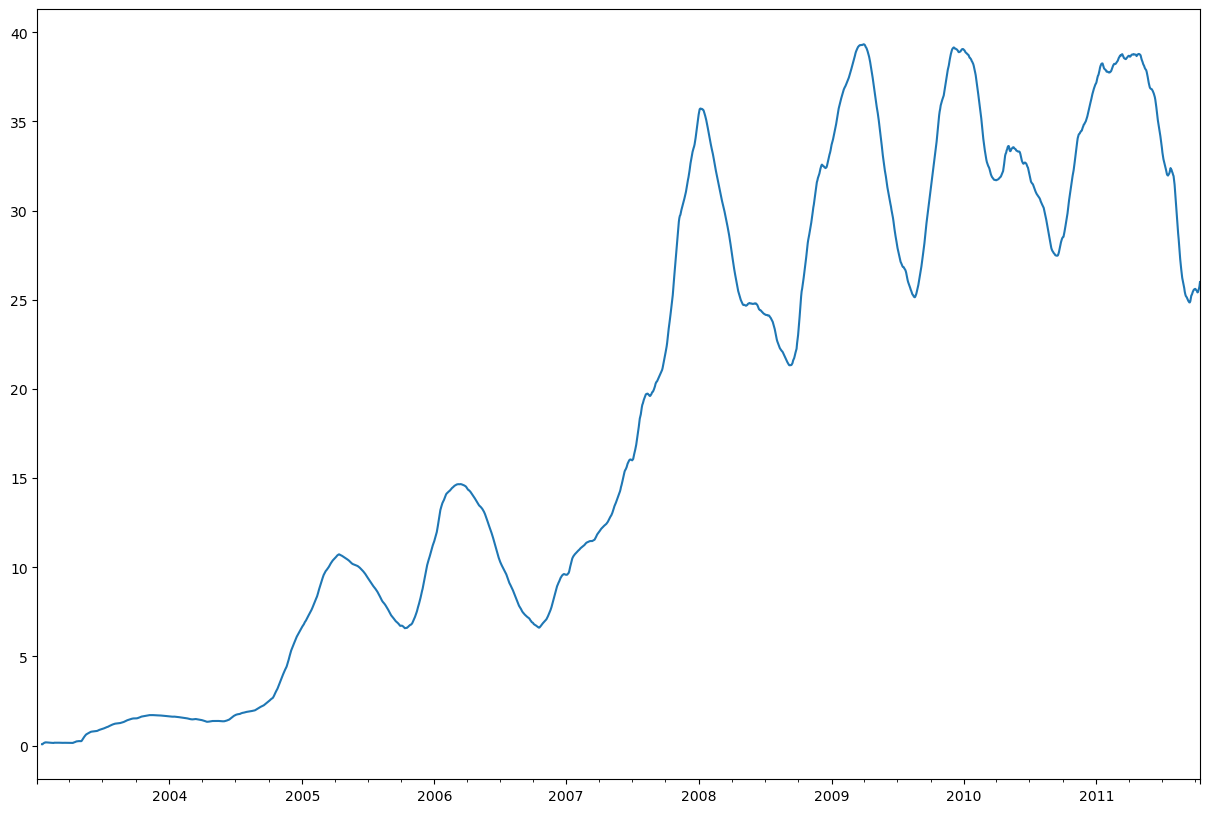

In [128]:
appl_std250.plot( figsize=(15,10) )

We can compute the cumulative mean of the time series by using rolling() with a window length equal to the Series length, and $min\_periods = 1$:

<Axes: >

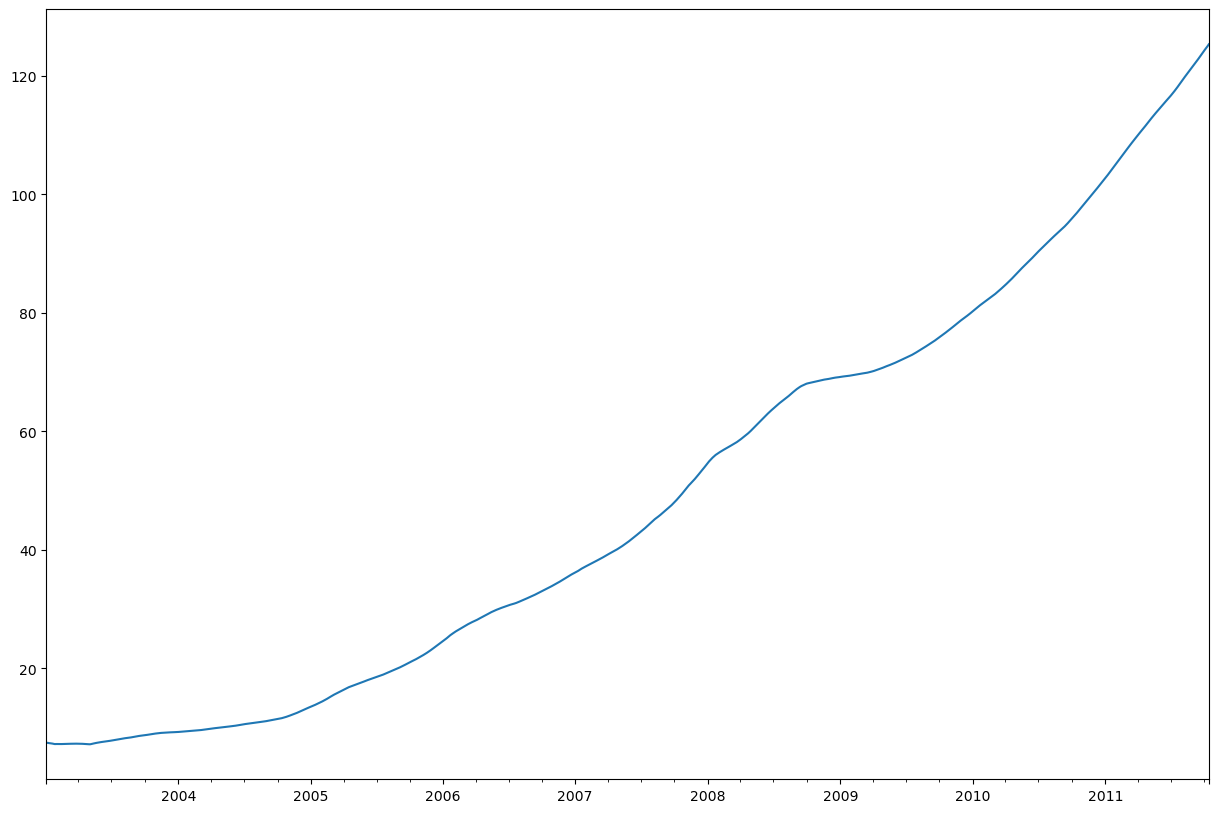

In [129]:
close_px.AAPL.rolling( window=len(close_px.AAPL), min_periods=1 ).mean().plot( figsize=(15,10) )

When called on a DataFrame, the moving window is applied to each column independently:

<Axes: >

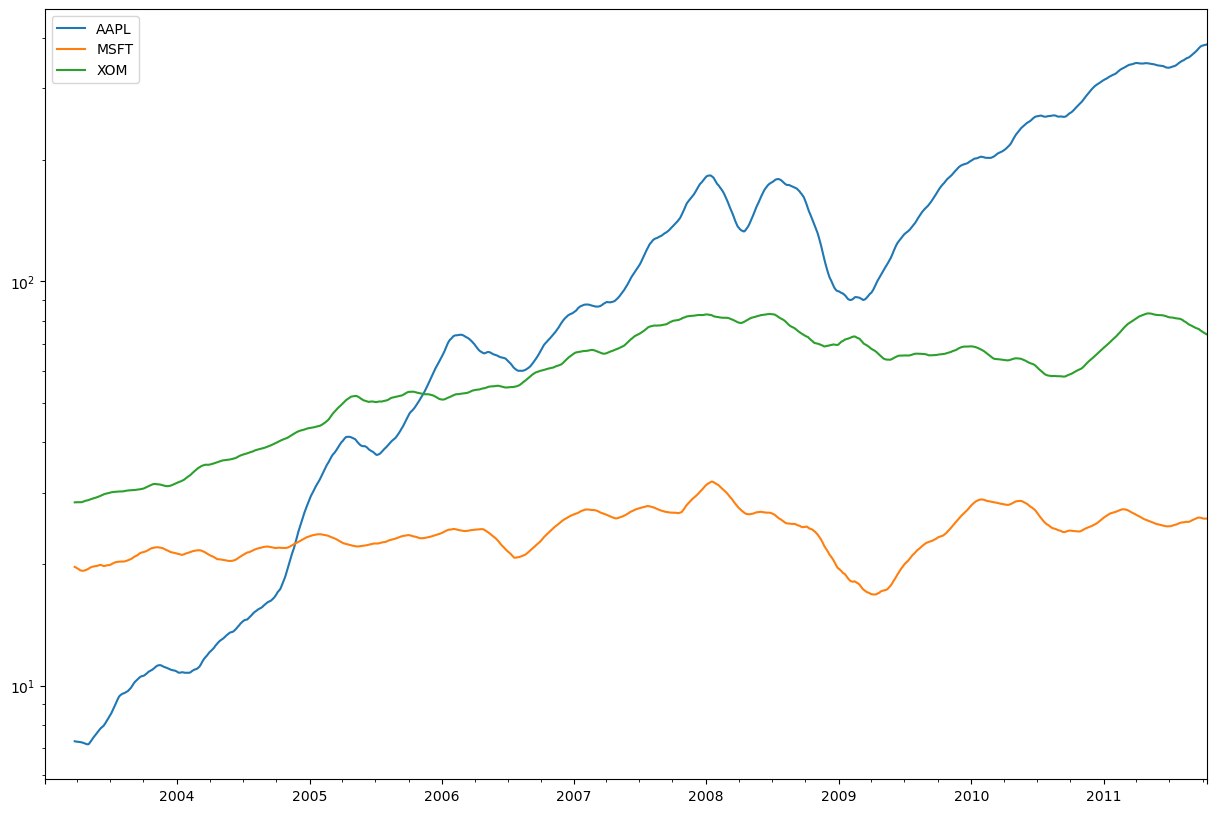

In [130]:
close_px.rolling( window=60 ).mean().plot(logy=True, figsize=(15,10) )